In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
# %matplotlib inline

In [2]:
PATH_DATA = "/mnt/data/git/WikiBrain/src/main/resources/clusters/"
PATH_WW2 = PATH_DATA + "ww2/part-00000"
PATH_SB = PATH_DATA + "superBowl/part-00000"
PATH_CHARLIE = PATH_DATA + "charlie_cluster/part-00000"
PATH_CHARLIE_NGBHRS = PATH_DATA + "charlie/part-00000"
PATH_CHARLIE_WEEK = PATH_DATA + "charlie_week/part-00000"
PATH_FERGUSON_WEEK = PATH_DATA + "ferguson_week/part-00000"
PATH_GERMANWINGS_WEEK = PATH_DATA + "germanwings_week/part-00000"
PATH_GERMANWINGS_MONTH = PATH_DATA + "germanwings_month/part-00000"

PATH_WW2_LABELS = PATH_DATA + "trainded_graphs_1_0_cleaned _WW2_labels.csv"
PATH_SB_LABELS = PATH_DATA + "trainded_graphs_1_0_cleaned_FEB_SB_cluster.csv"
PATH_CHARLIE_LABELS = PATH_DATA + "trainded_graphs_1_0_cleaned_charlie_cluster.csv"
PATH_CHARLIE_NGHBRS_LABELS = PATH_DATA + "trainded_graphs_1_0_cleaned _Charlie.csv"
PATH_CHARLIE_WEEK_LABELS = PATH_DATA + "Charlie_Hebdo_one_week_5_12_January.csv"
PATH_FERGUSON_WEEK_LABELS = PATH_DATA + "Ferguson_one_week_22_03_December.csv"
PATH_GERMANWINGS_WEEK_LABELS = PATH_DATA + "GermanWings_week.csv"
PATH_GERMANWINGS_MONTH_LABELS = PATH_DATA + "GermanWings_month.csv"

#after standard deviation improvement
PATH_FERGUSON_WEEK_STDDEV = PATH_DATA + "ferguson_stddev/part-00000"
PATH_CHARLIE_WEEK_STDDEV = PATH_DATA + "charlie_stddev/part-00000"
PATH_GERMANWINGS_WEEK_STDDEV = PATH_DATA + "germanwings_stddev/part-00000"

PATH_FERGUSON_WEEK_LABELS_STDDEV = PATH_DATA + "ferguson_week_stddev.csv"
PATH_CHARLIE_WEEK_LABELS_STDDEV = PATH_DATA + "charlie_week_stddev.csv"
PATH_GERMANWINGS_WEEK_LABELS_STDDEV = PATH_DATA + "germanwings_week_stddev.csv"

In [3]:
# PATH_ACTIVATIONS = PATH_GERMANWINGS_WEEK_STDDEV #actications
# PATH_LABELS = PATH_GERMANWINGS_WEEK_LABELS_STDDEV # labels
PATH_ACTIVATIONS = PATH_SB #actications
PATH_LABELS = PATH_SB_LABELS # labels

In [4]:
with open(PATH_ACTIVATIONS) as f:
    content = f.readlines()

In [5]:
content = list(map(
    lambda x: list(map(
        lambda s: s.replace('(', '').replace(')','').replace('[','').replace(']','').replace('.0', ''), x.split(','))), 
    [x.strip() for x in content]))

In [6]:
content = list(map(lambda l: [int(x) for x in l], content))

In [7]:
ids = list(map(lambda l: l[0], content))

In [8]:
with open(PATH_LABELS) as f:
    idsLabels = f.readlines()
idsLabels = [x.strip() for x in idsLabels]

In [9]:
idsLabels = [(int(l[0]), l[1]) for l in [t.split(',') for t in idsLabels]]
idsLabels_ = idsLabels

In [10]:
import string
printable = set(string.printable)
idsLabels = [(int(l[0]), l[1]) for l in idsLabels]

In [11]:
idsLabels = dict(idsLabels)

In [12]:
idsLabels

{1009736: '12th_man_(football)',
 14202514: '1972_Miami_Dolphins_season',
 8740516: '1985_Chicago_Bears_season',
 3495580: '2000_NFL_draft',
 10716061: '2001_New_England_Patriots_season',
 2310935: '2001_NFL_season',
 10716158: '2003_New_England_Patriots_season',
 10716211: '2004_New_England_Patriots_season',
 2296131: '2004_NFL_season',
 6090474: '2005_Seattle_Seahawks_season',
 4470866: '2006_Rose_Bowl',
 9996756: '2007_New_England_Patriots_season',
 15300612: '2007_New_England_Patriots_videotaping_controversy',
 4040359: '2007_NFL_season',
 21080308: '2010_NFL_draft',
 30295983: '2011_New_England_Patriots_season',
 29724707: '2011_New_York_Giants_season',
 25577385: '2011_NFL_season',
 34232609: '2012_Baltimore_Ravens_season',
 28932670: '2012_NFL_draft',
 37982175: '2013_Denver_Broncos_season',
 28366740: '2013_NFL_season',
 37982259: '2013_Seattle_Seahawks_season',
 38089671: '2013–14_NFL_playoffs',
 41378687: '2014_New_England_Patriots_season',
 35675414: '2014_NFL_draft',
 38404

### GO TO PLOT SECTION
### Filtering for particular clusters (Run only if needed)

#### 1. SB: Only NFL teams

In [138]:
nfl_teams = ['Buffalo_Bills','Miami_Dolphins','New_England_Patriots','New_York_Jets','Baltimore_Ravens','Cincinnati_Bengals','Cleveland_Browns','Pittsburgh_Steelers','Houston_Texans','Indianapolis_Colts','Jacksonville_Jaguars','Tennessee_Titans','Denver_Broncos','Kansas_City_Chiefs','Los_Angeles_Chargers','Oakland_Raiders','Dallas_Cowboys','New_York_Giants','Philadelphia_Eagles','Washington_Redskins','Chicago_Bears','Detroit_Lions','Green_Bay_Packers','Minnesota_Vikings','Atlanta_Falcons','Carolina_Panthers','New_Orleans_Saints','Tampa_Bay_Buccaneers','Arizona_Cardinals','Los_Angeles_Rams','San_Francisco_49ers','Seattle_Seahawks']

In [ ]:
count = 0
for team in nfl_teams:
    if team in idsLabels.values():
        count += 1
count

In [ ]:
nfl_labels = []
for team in nfl_teams:
    for label in idsLabels_:
        if label[1] == team:
            nfl_labels.append(label)

In [ ]:
import string
printable = set(string.printable)
nfl_labels = map(lambda l: (int(l[0]), filter(lambda x: x in printable, l[1])), nfl_labels)

In [ ]:
nfl_labels = dict(nfl_labels)

In [ ]:
contentSB = []
for c in content:
    if c[0] in nfl_labels.keys():
        contentSB.append(c)
content = contentSB

In [ ]:
idsLabels = nfl_labels

#### 2. CHARLIE. Remove particular pages by index in the "content" array

In [ ]:
# indexToDelete = [2,6,12,18,20]
# deleted = 0

# for i in indexToDelete:
#     i -= deleted
#     deleted += 1
#     del content[i]
#     del ids[i]

### PLOT

In [13]:
months = ['October', 'November', 'December', 'January', 'February', 'March', 'April']

In [14]:
x_mon = [i for i in np.arange(0, len(content[0]), 7*24)]
x_sat = [i for i in np.arange(5*24, len(content[0]), 7*24)]
x_month = [i for i in np.arange(8*24, len(content[0]), 30*24)]

In [15]:
x_month[1] = x_month[1] + 24 #October
x_month[2] = x_month[2] + 24 #November
x_month[3] = x_month[3] + 48 #December
x_month[4] = x_month[4] + 72 #January
x_month[5] = x_month[5] + 24 #February
x_month[6] = x_month[6] + 48 #March
x_month[7] = x_month[7] + 48 #April

In [16]:
from pylab import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [17]:
sorted_content = sorted(content, key = lambda c: c[0])

In [18]:
ids = list(idsLabels.keys())
ids.sort()
# ids = ids # for Charlie neighbors filtering. If needed

#### Activations

In [19]:
# rcParams['figure.figsize'] = 50, 70
# rcParams['xtick.labelsize'] = 50
# rcParams['ytick.labelsize'] = 50
# plt.imshow(map(lambda l: l[0:], sorted_content), cmap="Blues", interpolation='nearest', aspect='auto', norm=colors.PowerNorm(gamma=1./10.))
# plt.colorbar()
# plt.xticks([i + 15*24 for i in x_month], [month for month in months])
# plt.yticks([i for i in range(0,len(sorted_content))], [idsLabels[x] for x in ids])
# # for xc in x_mon:
# #     plt.axvline(x=xc, linewidth=1, color = 'b')
# for xc in x_month:
#     plt.axvline(x=xc, linewidth=1, color = 'r')
# # for xc in x_sat:
# #     plt.axvline(x=xc, linewidth=1, color = 'g')

### Overall cluster activity

In [20]:
content_t = np.transpose([l[1:] for l in content])
summary = [sum(l) for l in content_t]

In [21]:
from math import log

Get Google trends

In [22]:
from pytrends.request import TrendReq
import pandas as pd

In [24]:
# keyword = ['Super Bowl', 'Germanwings Flight 9525', 'Charlie Hebdo', 'Ferguson unrest']
keyword = ['Super Bowl']
pytrend = TrendReq(hl='en-WORLD')
pytrend.build_payload(kw_list=keyword, timeframe='2014-09-23 2015-04-30', geo='', gprop='')

In [25]:
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df.shape

(220, 2)

In [26]:
interest_over_time_df = interest_over_time_df.drop(['isPartial'], axis=1)

In [27]:
summary_day = [sum(summary[i:i + 24]) for i in range(0, len(summary), 24)]
summary_day = [x*100.0 / max(summary_day) for x in summary_day]

In [28]:
interest_over_time_df['Proposed'] = summary_day
interest_over_time_df.columns = ['Google Trends', 'Proposed']

In [29]:
plt.style.use(['dark_background', 'seaborn-talk'])

In [30]:
rcParams['figure.figsize'] = 25, 12
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 50

In [31]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['#0099FF', '#990033']), None, len(interest_over_time_df)))

In [32]:
# interest_over_time_df.plot(linewidth=5, color=my_colors, dashes=[20, 20])
# # plt.title('Charlie Hebdo')
# plt.xlabel('')
# plt.legend(prop={'size':34}, loc=2)

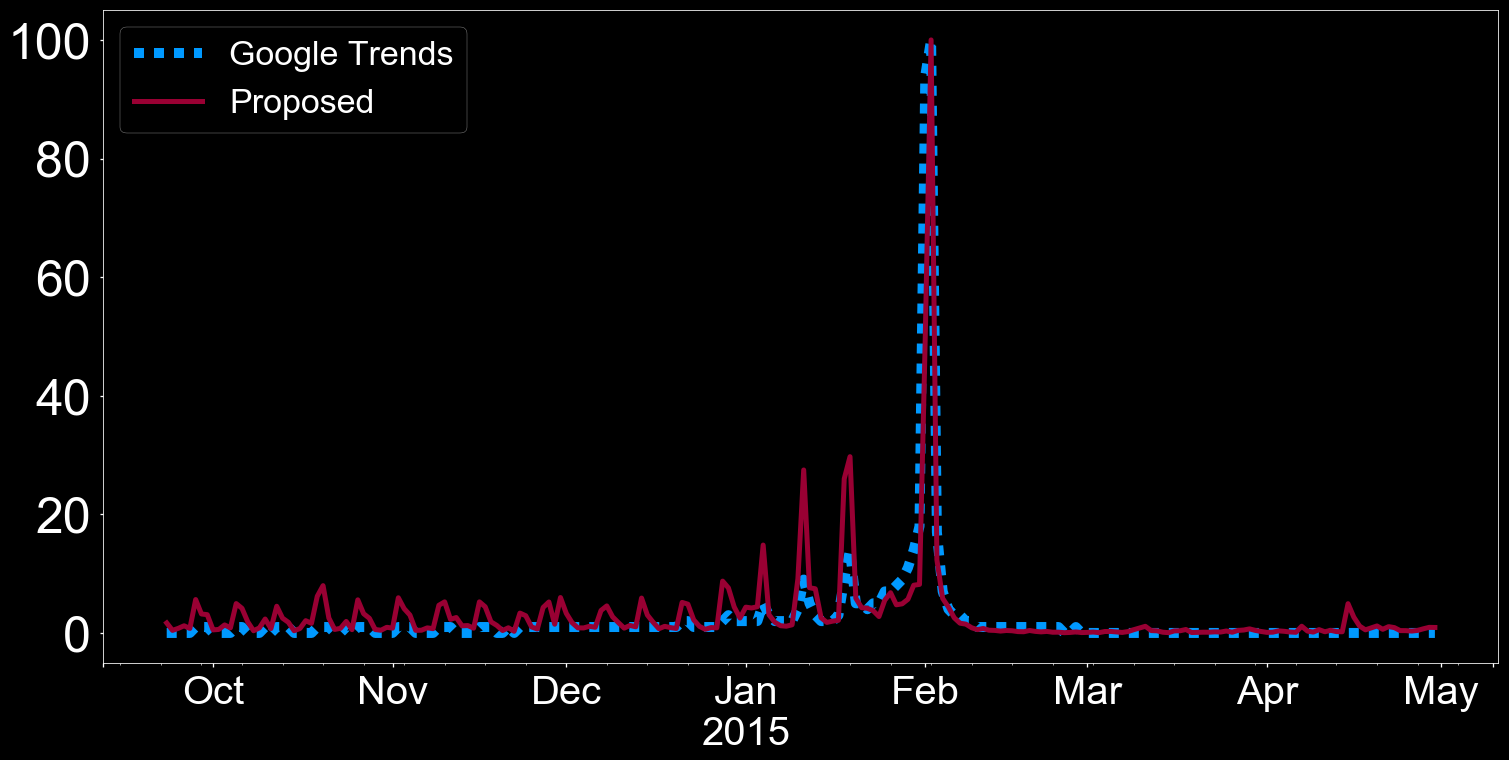

In [33]:
interest_over_time_df['Google Trends'].plot(linewidth=10, color=my_colors[0], dashes=[1, 1])
interest_over_time_df['Proposed'].plot(linewidth=5, color=my_colors[1])
plt.xlabel('')
plt.legend(prop={'size':34}, loc=2)

In [32]:
plt.savefig("charlie_activity.pdf", format='pdf', dpi=200)

#### Summary timeline

In [ ]:
rcParams['figure.figsize'] = 25, 10
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 50
# plt.grid()
# for xc in x_mon:
#     plt.axvline(x=xc, linewidth=1, color = 'b')
for xc in x_month:
    plt.axvline(x=xc, linewidth=1, color = 'black')
# for xc in x_sat:
#     plt.axvline(x=xc, linewidth=1, color = 'g')
x_ticks = [i + 15*24 for i in x_month]
x_ticks[-1] -= 15*24
plt.xticks(x_ticks, [month for month in months])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(summary, 'r', linewidth=3)

#### Activations + Summary timeline

In [ ]:
import itertools
gt = interest_over_time_df['Google Trends'].tolist()
proposed = interest_over_time_df['Proposed'].tolist()
gt = list(itertools.chain.from_iterable(itertools.repeat(x, 24) for x in gt))
proposed = list(itertools.chain.from_iterable(itertools.repeat(x, 24) for x in proposed))

In [ ]:
def savitzky_golay(y, window_size=747, order=2, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [ ]:
gt = savitzky_golay(np.array(gt), window_size=25)
proposed = savitzky_golay(np.array(proposed), window_size=25)

In [ ]:
# rcParams['figure.figsize'] = 90, 60
# rcParams['xtick.labelsize'] = 80
# rcParams['ytick.labelsize'] = 50
# plt.rcParams['axes.facecolor'] = 'black'
# rcParams["ytick.color"] = "w"
# rcParams["xtick.color"] = "w"
# rcParams["figure.facecolor"] = '#121212'

# ids = idsLabels.keys()
# ids.sort()
# scaling_factor = 0.0002
# #plot overall statistics
# plt.plot([s * scaling_factor - 0.5 for s in summary], '#00FF00', linewidth=3)
# plt.plot([s * scaling_factor - 0.5 for s in summary], '#00FF00', linewidth=7)
# plt.ylim([-0.5, len(content) - 0.5])
# #plot activations
# plt.imshow(map(lambda l: l[0:], sorted_content), cmap="gray", interpolation='nearest', aspect='auto', norm=colors.PowerNorm(gamma=1./10.))
# plt.yticks([i for i in range(0,len(sorted_content))], [idsLabels[x] for x in ids])
# x_ticks = [i + 15*24 for i in x_month]
# x_ticks[-1] -= 15*24
# plt.xticks(x_ticks, [month for month in months])
# # for xc in x_mon:
# #     plt.axvline(x=xc, linewidth=1, color = 'b')
# for xc in x_month:
#     plt.axvline(x=xc, linewidth=2, color = 'w')
# # for xc in x_sat:
# #     plt.axvline(x=xc, linewidth=1, color = 'g')
# plt.colorbar()

# # plt.show()
rcParams['figure.figsize'] = 90, 40
rcParams['xtick.labelsize'] = 70
rcParams['ytick.labelsize'] = 70
# rcParams["ytick.color"] = "w"
# rcParams["xtick.color"] = "w"
# rcParams["figure.facecolor"] = '#121212'

ids = idsLabels.keys()
ids.sort()
scaling_factor = 0.0001
#plot overall statistics
# plt.plot([s * scaling_factor - 0.5 for s in summary], '#00FF00', linewidth=3)
# plt.plot([s * scaling_factor - 0.5 for s in summary], 'r', linewidth=3)
# interest_over_time_df.plot(linewidth=5, color=my_colors)
plt.plot([s * 0.2 - 0.5 for s in gt], my_colors[0], linewidth=15, dashes=[20, 20], linestyle = 'None')
plt.plot([s * 0.2 - 0.5 for s in proposed], 'red', linewidth=10)
plt.ylim([-0.5, len(content) - 0.5])
#plot activations
plt.imshow(map(lambda l: l[0:], sorted_content), cmap="Greys", interpolation='nearest', aspect='auto', norm=colors.PowerNorm(gamma=1./30.))
plt.yticks([i for i in range(0,len(sorted_content))], [idsLabels[x].replace("_", " ") for x in ids])
x_ticks = [i + 15*24 for i in x_month]
x_ticks[-1] -= 15*24
plt.xticks(x_ticks, [month for month in months])
plt.legend(['Google Trends', 'Proposed'], prop={'size':70})
# for xc in x_mon:
#     plt.axvline(x=xc, linewidth=1, color = 'b')
# for xc in x_month:
#     plt.axvline(x=xc, linewidth=5, color = 'black')
# for xc in x_sat:
#     plt.axvline(x=xc, linewidth=1, color = 'g')
from matplotlib import ticker
cb = plt.colorbar()
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()

In [ ]:
plt.savefig("activity.svg", format='svg',dpi=200, bbox_inches='tight')